# KNN Assignment
*Name:* Zach Novak

*PID:* za659148

*Date:* 3/9/2025

The dataset 'bank_marketing.csv' is related with direct marketing campaigns (phone calls) of a banking institution. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Important: When you read the csv file, you might need to manipulate the columns somehow for better printing.

For more information abour the dataset, please check out the link below:
https://archive.ics.uci.edu/dataset/222/bank+marketing

## Step 1: import necessary libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# read the CSV with the ; separator
df = pd.read_csv('data/bank_marketing.csv', sep=';')
print(df.head(1))
print(df.shape)
print(df.info())

# check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

   age        job  marital education default housing loan    contact month  \
0   56  housemaid  married  basic.4y      no      no   no  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  

[1 rows x 21 columns]
(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact     

## Step 2: Preprocessing

We can see from the above code that there are no missing values in the dataset.

Let's get an inventory of all the unqiue values in each feature so we can plan out the preprocessing approach. This also can be a method to spot bad data or slight variations within the data.

In [3]:
# list of columns to check for unique values
columns_to_check = df.columns

# print unique values for each column
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique values in 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in 'marital':
['married' 'single' 'divorced' 'unknown']

Unique values in 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in 'default':
['no' 'unknown' 'yes']

Unique values in 'housing':
['no' 'yes' 'unknown']

Unique values in 'loan':
['no' 'yes' 'unknown']

Unique values in 'contact':
['telephone' 'cellular']

Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values in 'day_of_week':
['mon' 'tue' 'we

Description of features:

- age: 
    - age of the client
- job: 
    - the job of the client
- marital: 
    - marital status of the client
- education: 
    - education level of the client
- default: 
    - whether the client has credit in default
- housing: 
    - whether the client has a housing loan
- loan: 
    - whether the client has a personal loan
- contact: 
    - type of contact method (cellular or telephone)
- month: 
    - month of the last contact
- day_of_week: 
    - day of the week of the last contact
- duration: 
    - duration of the last contact in seconds
- campaign: 
    - number of contacts during the current campaign
- pdays: 
    - number of days since the client was last contacted in a previous campaign (999 indicates no previous contact)
- previous: 
    - number of contacts performed before the current campaign
- poutcome: 
    - outcome of the previous marketing campaign (nonexistent, failure, success)
- emp.var.rate: 
    - employment variation rate (economic indicator)
- cons.price.idx: 
    - consumer price index (economic indicator)
- cons.conf.idx: 
    - consumer confidence index (economic indicator)
- euribor3m: 
    - 3-month Euribor rate (economic indicator)
- nr.employed: 
    - number of employees (economic indicator)
- y: 
    - whether the client subscribed to a term deposit (target variable)

To formulate my preprocessing approach, first, I categorize each feature into one of the two broad types: Numeric and Categorical.

Numerical features in the dataset are:
- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed

Categorical categories are:
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- day_of_week
- poutcome
- y

We can:
- Remove duplicate entries from the dataset
- Encode variables to a more machine readable format.
- Replace '999' in the pdays feature by creating a new feature called "first_campaign" since the '999' value means the client wasn't contacted before.with 'unknown' since it seems to be a placeholder
- We have already validated the data integrity such as typos or unreasonable values like age > 100 for the features.
- We have already validated there are not any NULL values.

Later in the notebook, you will see resampling done to the dataset to address a sample imbalance that was identified during the initial training process.


In [4]:
# check for duplicates
print("\nNumber of duplicates in the initial datset:", df.duplicated().sum())

# dop dupicates
df.drop_duplicates(inplace=True)
print("\nNumber of duplicates after dropping:", df.duplicated().sum())


Number of duplicates in the initial datset: 12

Number of duplicates after dropping: 0


### Numeric Features

Most of these features will be scaled shortly.

#### Pdays

In [5]:
# create the 'first_campaign' feature
def first_campaign(pdays):
    if pdays == 999:
        return 1
    else:
        return 0

df['first_campaign'] = df['pdays'].apply(first_campaign)

# display the first few rows to verify the new feature
print(df[['pdays', 'first_campaign']].head(10))

# print unique values and statistics for the new feature
print("\nUnique values in 'first_campaign':", df['first_campaign'].unique())
print("\nCount of first campaign vs returning customers:")
print(df['first_campaign'].value_counts())

   pdays  first_campaign
0    999               1
1    999               1
2    999               1
3    999               1
4    999               1
5    999               1
6    999               1
7    999               1
8    999               1
9    999               1

Unique values in 'first_campaign': [1 0]

Count of first campaign vs returning customers:
first_campaign
1    39661
0     1515
Name: count, dtype: int64


### Categorical Features

These can be further disected into binary (two values) and categorical features (over two values).

#### Job

In [6]:
# shape of the dataset before encoding
print("Shape of the dataset before encoding:", df.shape)

# first use Label Encoder for binary categorical variables
binary_features = ['default', 'housing', 'loan', 'y']
label_encoder = LabelEncoder()
for feature in binary_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# use one-hot encoding for non-binary categorical variables
categorical_features = ['job', 'contact', 'marital', 'education', 'month', 'day_of_week', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# print the shape of the new dataframe to see how many features we now have
print("Shape of the dataset after encoding:", df_encoded.shape)
print("\nNew features:", df_encoded.columns.tolist())

Shape of the dataset before encoding: (41176, 22)
Shape of the dataset after encoding: (41176, 59)

New features: ['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'first_campaign', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'contact_cellular', 'contact_telephone', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_we

The age, duration, campaign, pdays, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, emp. var.rate are all quantitative features. However, pdays has a special indicator of 999 which would be treated as an outlier incorrectly. The economic indicator features have very narrow ranges and although some extreme ranges may be outliers, they reflect an important time in economic events which can impact sales.
Let's review the appropraite features to see if there are any outliers that could skew the training.

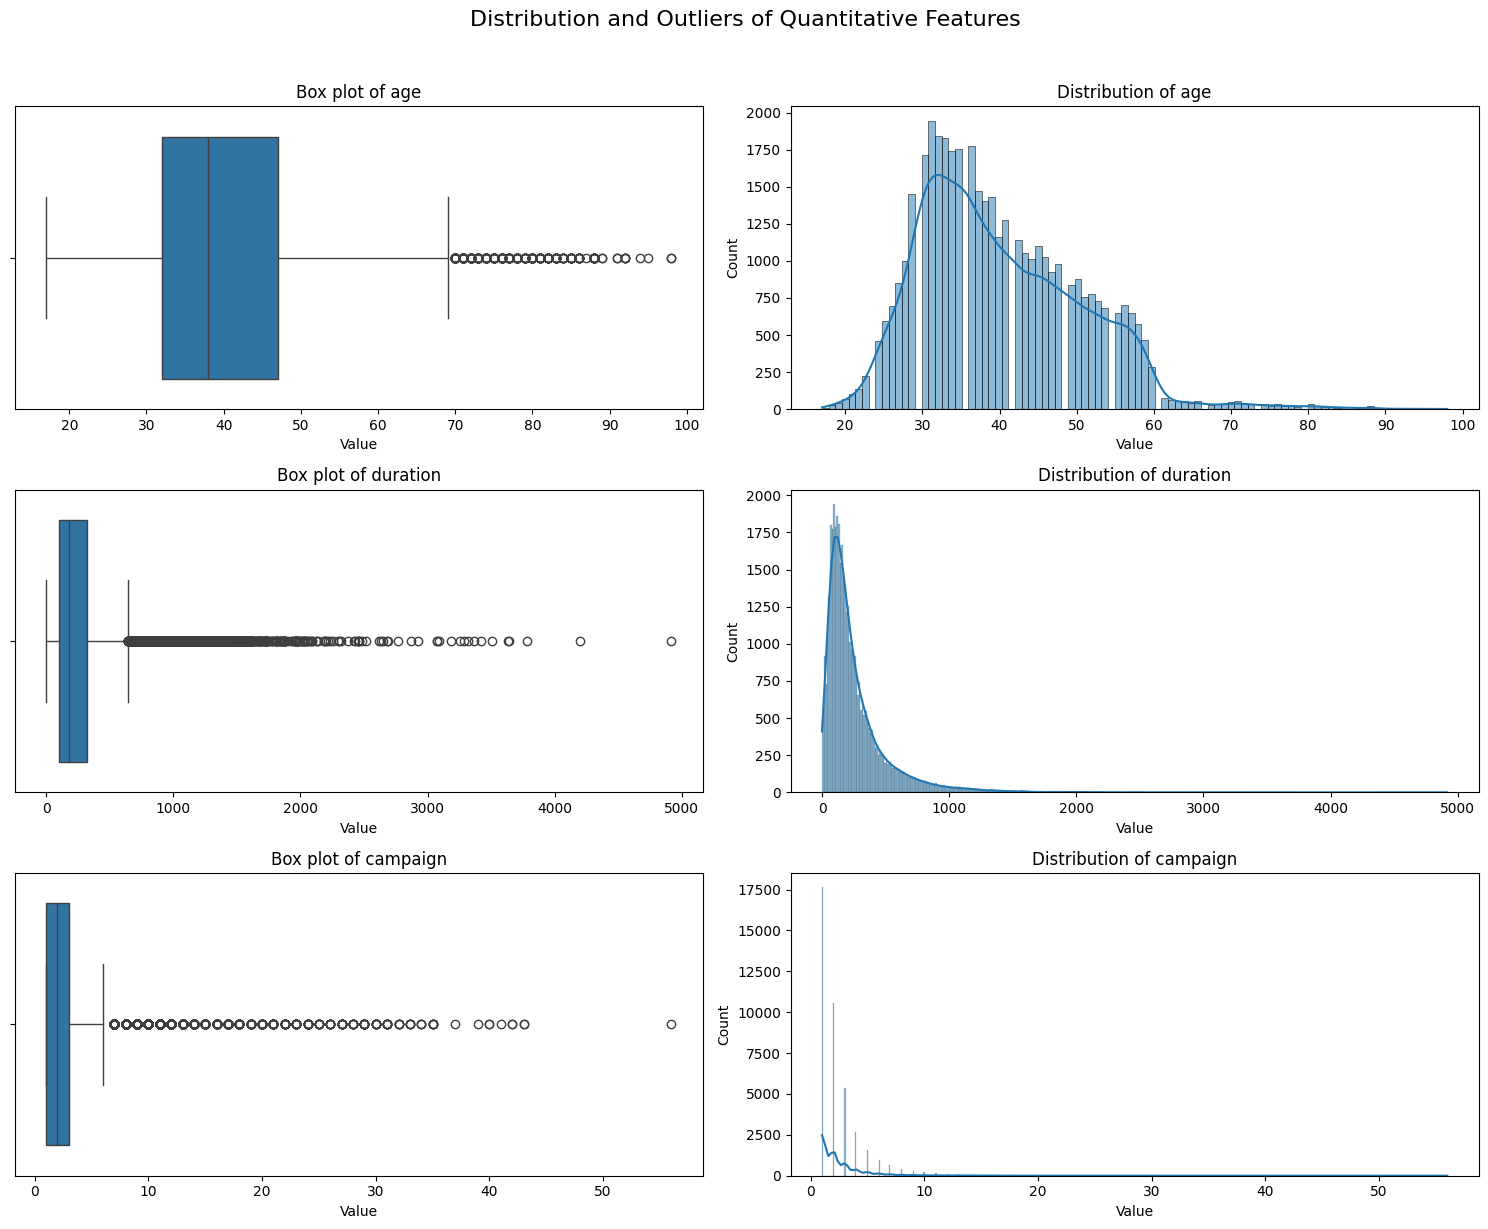

In [7]:
#@ Initial check of feature distribution

# list of quantitative features to check for outliers
quantitative_features = ['age','duration', 'campaign']

# create box plots and histograms for each quantitative feature
fig, axes = plt.subplots(len(quantitative_features), 2, figsize=(15, 4*len(quantitative_features)))
fig.suptitle('Distribution and Outliers of Quantitative Features', fontsize=16, y=1.02)

for i, feature in enumerate(quantitative_features):
    # box plot
    sns.boxplot(x=df[feature], ax=axes[i,0])
    axes[i,0].set_title(f'Box plot of {feature}')
    axes[i,0].set_xlabel('Value')
    
    # histogram with KDE
    sns.histplot(df[feature], kde=True, ax=axes[i,1])
    axes[i,1].set_title(f'Distribution of {feature}')
    axes[i,1].set_xlabel('Value')

plt.tight_layout()
plt.show()

From the visualiazations which help us understand the data better, we see there are outliers. It is beneficial to filter outliers because of the KNN model's distance based algorithm.

In [8]:
#@ Remove outliers using IQR

# print the shape of the dataset before removing outliers
print("Shape of the dataset before removing outliers: ", df.shape)

# function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# remove outliers for each quantitative feature
for feature in quantitative_features:
    df = remove_outliers(df, feature)

# Print the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers: ", df.shape)

Shape of the dataset before removing outliers:  (41176, 22)
Shape of the dataset after removing outliers:  (35524, 22)


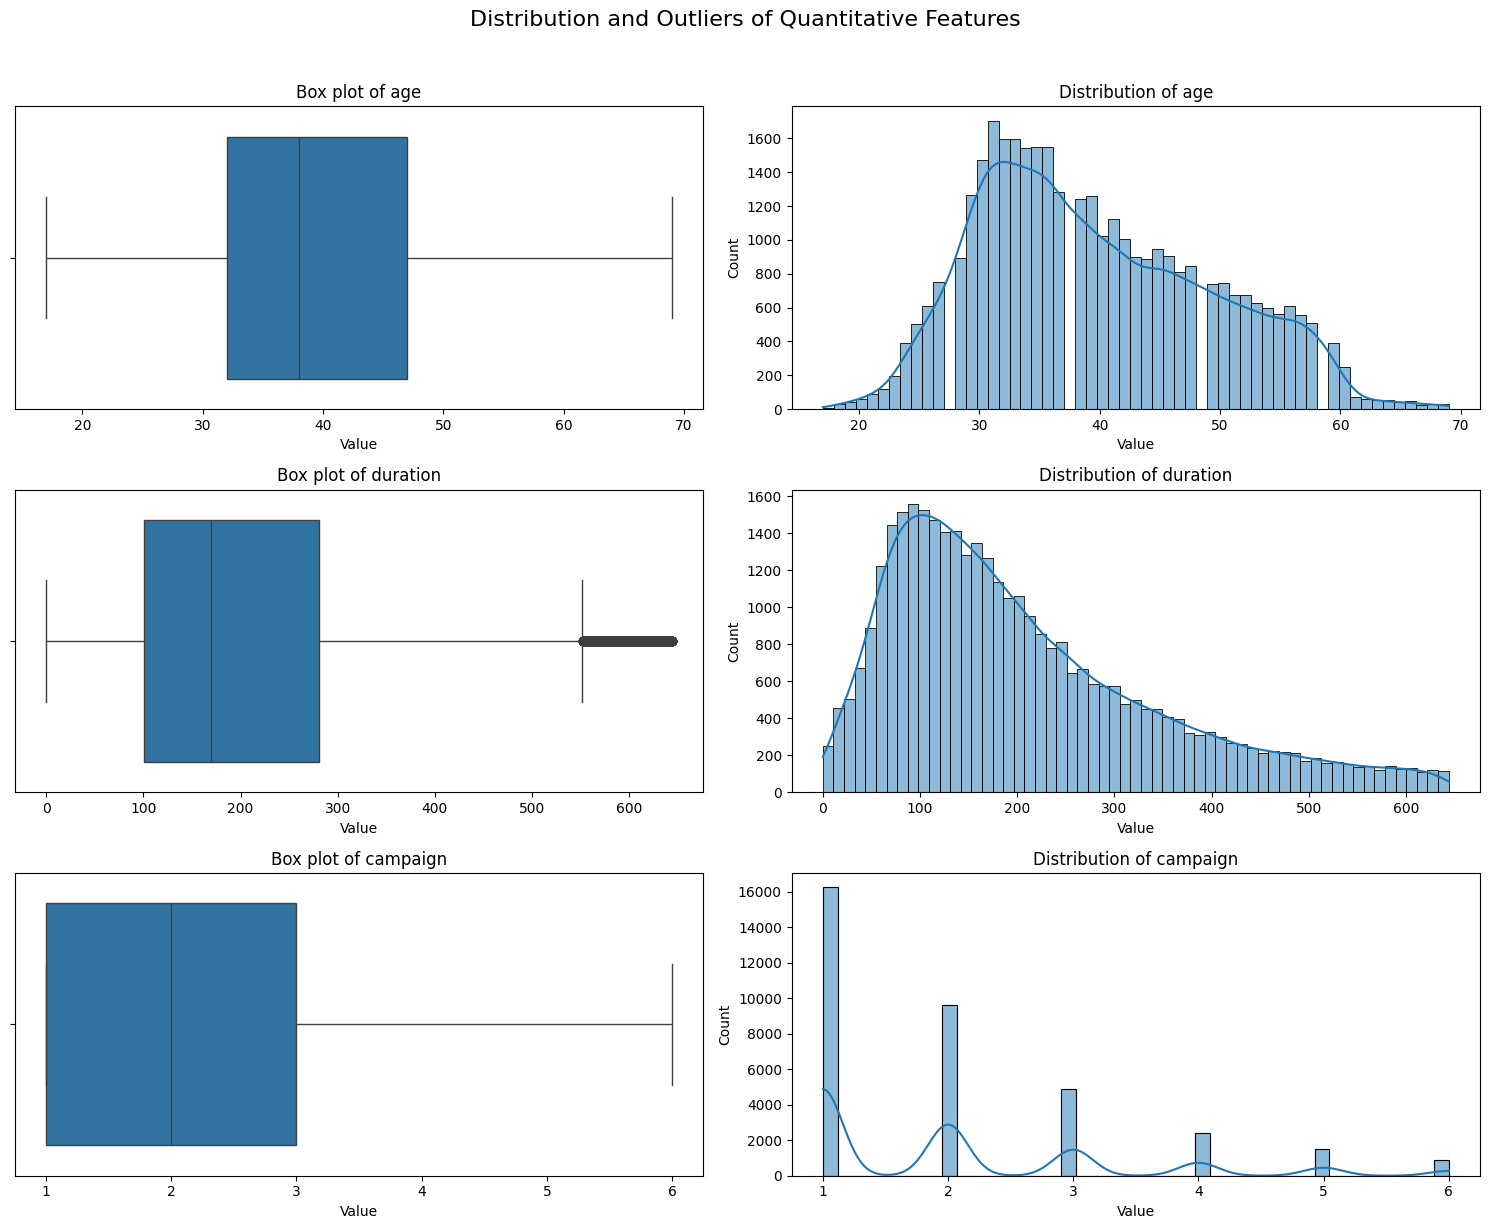

In [9]:
#@ Check for outliers again

# create box plots and histograms for each quantitative feature
fig, axes = plt.subplots(len(quantitative_features), 2, figsize=(15, 4*len(quantitative_features)))
fig.suptitle('Distribution and Outliers of Quantitative Features', fontsize=16, y=1.02)

for i, feature in enumerate(quantitative_features):
    # box plot
    sns.boxplot(x=df[feature], ax=axes[i,0])
    axes[i,0].set_title(f'Box plot of {feature}')
    axes[i,0].set_xlabel('Value')
    
    # histogram with KDE
    sns.histplot(df[feature], kde=True, ax=axes[i,1])
    axes[i,1].set_title(f'Distribution of {feature}')
    axes[i,1].set_xlabel('Value')

plt.tight_layout()
plt.show()

In [10]:
# preview of the now encoded dataset
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,261,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
1,57,1,0,0,149,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
2,37,0,2,0,226,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
3,40,0,0,0,151,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False
4,56,0,0,2,307,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,True,False


## Step 3: Scale the features (important for KNN)

Scaling is very importing in a KNN model since a KNN model is a distance based algorithm.

Let's scale the numerical variables in the Duration and Campaign features.

In [11]:
# create a scaler object
scaler = StandardScaler()

numerical_features = ['age','duration','campaign','previous','emp.var.rate','cons.price.idx']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# verify the scaling by checking mean (should be ~0) and std (should be ~1)
print("Scaled features statistics:")
print(df[numerical_features].describe())

Scaled features statistics:
                age      duration      campaign      previous  emp.var.rate  \
count  3.552400e+04  3.552400e+04  3.552400e+04  3.552400e+04  3.552400e+04   
mean  -2.960261e-16  1.024090e-16  6.400565e-18 -5.120452e-17 -1.280113e-17   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -2.335079e+00 -1.476385e+00 -8.130992e-01 -3.547218e-01 -2.211149e+00   
25%   -7.852452e-01 -7.553683e-01 -8.130992e-01 -3.547218e-01 -1.190113e+00   
50%   -1.653116e-01 -2.627929e-01 -3.441435e-02 -3.547218e-01  6.605166e-01   
75%    7.645889e-01  5.296111e-01  7.442705e-01 -3.547218e-01  8.519610e-01   
max    3.037679e+00  3.120986e+00  3.080325e+00  1.383347e+01  8.519610e-01   

       cons.price.idx  
count    3.552400e+04  
mean    -3.040908e-14  
std      1.000014e+00  
min     -2.366423e+00  
25%     -8.516760e-01  
50%     -2.121545e-01  
75%      7.410617e-01  
max      2.080764e+00  


one-hot encoding increases dimensionality which can impact the KNN model's performance. Because of this, a dimenstionality reduction technique like PCA can help retain the most relevant information.

In [12]:
# shape of the dataset before PCA
print("Shape of the dataset before PCA:", df_encoded.shape)

# define the number of components to keep
n_components = 10

# initialize PCA
pca = PCA(n_components=n_components)

# separate features and target variable
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# fit and transform the data
X_pca = pca.fit_transform(X)

# print the explained variance ratio to see how much variance is captured by each component
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

# print the shape of the transformed data
print("Shape of the data after PCA:", X_pca.shape)

Shape of the dataset before PCA: (41176, 59)
Explained variance ratio by each component:
[6.26899571e-01 3.30920834e-01 4.08424786e-02 1.01314945e-03
 1.91157215e-04 6.95168105e-05 9.56513065e-06 8.38301951e-06
 4.85134425e-06 4.11806307e-06]
Shape of the data after PCA: (41176, 10)


## Step 4: Define features (X) and target (y)

In [13]:
# assuming df_encoded is your fully preprocessed dataframe
y = df_encoded['y']
X = df_encoded.drop('y', axis=1)

## Step 5: Split into training and test sets (80 & 20)

In [14]:
# split the data into 80/20 train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6, 7 & 8: Find the optimal K using 5-fold cross-validation, plot the error rates & print the optimal K-value.

A small K can be noisy and sensitive to outliers, while a large K may smooth out patterns too much.

k = 1, Error Rate = 0.1112
k = 2, Error Rate = 0.1002
k = 3, Error Rate = 0.0988
k = 4, Error Rate = 0.0961
k = 5, Error Rate = 0.0944
k = 6, Error Rate = 0.0928
k = 7, Error Rate = 0.0929
k = 8, Error Rate = 0.0916
k = 9, Error Rate = 0.0915
k = 10, Error Rate = 0.0900
k = 11, Error Rate = 0.0896
k = 12, Error Rate = 0.0894
k = 13, Error Rate = 0.0895
k = 14, Error Rate = 0.0884
k = 15, Error Rate = 0.0887
k = 16, Error Rate = 0.0885
k = 17, Error Rate = 0.0883
k = 18, Error Rate = 0.0876
k = 19, Error Rate = 0.0880
k = 20, Error Rate = 0.0880
k = 21, Error Rate = 0.0879
k = 22, Error Rate = 0.0878
k = 23, Error Rate = 0.0873
k = 24, Error Rate = 0.0879
k = 25, Error Rate = 0.0876
k = 26, Error Rate = 0.0880
k = 27, Error Rate = 0.0876
k = 28, Error Rate = 0.0874
k = 29, Error Rate = 0.0875
k = 30, Error Rate = 0.0872
k = 31, Error Rate = 0.0877
k = 32, Error Rate = 0.0877
k = 33, Error Rate = 0.0871
k = 34, Error Rate = 0.0878
k = 35, Error Rate = 0.0869
k = 36, Error Rate = 0.0871
k

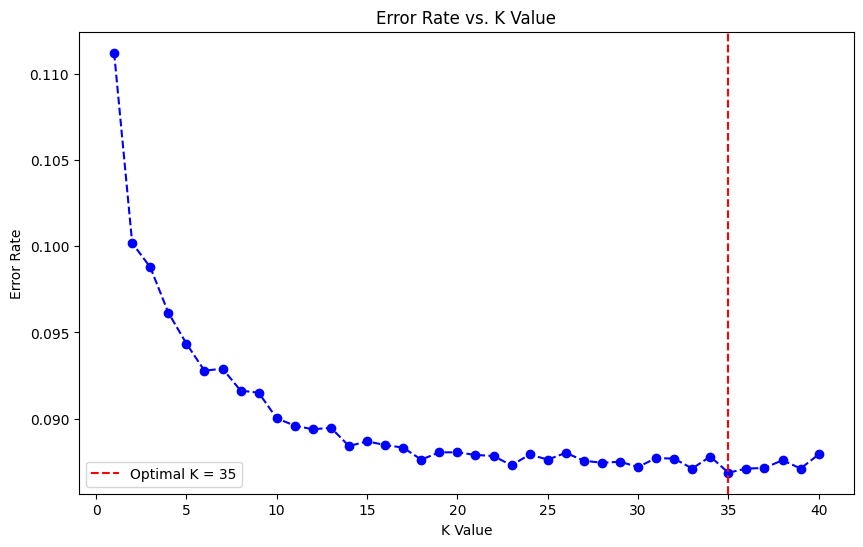

In [15]:
# define a range of k values to test
k_values = range(1, 41)  # range to test for k
error_rates = []

# use 5-fold cross-validation to compute the error rate for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # compute cross-validated accuracy on the training data
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    error_rate = 1 - scores.mean()  # error rate = 1 - average accuracy
    error_rates.append(error_rate)
    print(f"k = {k}, Error Rate = {error_rate:.4f}")

# identify the optimal k
optimal_k = k_values[np.argmin(error_rates)]
print("\nOptimal K (with lowest error rate):", optimal_k)

# visualization of error rates vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--', color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()


## Step 9 & 10: Train the final KNN model with the optimal K and make predictions

In [16]:
# train the final KNN model with the optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn_final.predict(X_test)

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9079650315687227

Confusion Matrix:
[[7019  246]
 [ 512  459]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.65      0.47      0.55       971

    accuracy                           0.91      8236
   macro avg       0.79      0.72      0.75      8236
weighted avg       0.90      0.91      0.90      8236



## Step 11: Model evaluation

Test Accuracy: 0.9079650315687227

Confusion Matrix:
[[7019  246]
 [ 512  459]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.65      0.47      0.55       971

    accuracy                           0.91      8236
   macro avg       0.79      0.72      0.75      8236
weighted avg       0.90      0.91      0.90      8236



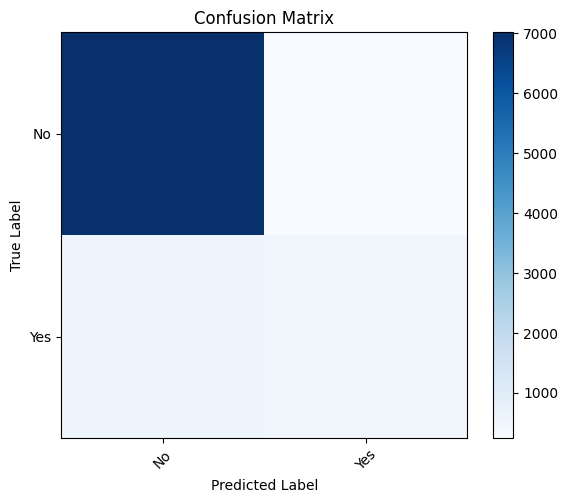

In [17]:
# Evaluate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Compute the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set the tick marks and labels; adjust class labels if necessary
classes = ['No', 'Yes']  # Change these if your labels differ
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


#### Interpretation:

This model predicts the majority class (class 0) very well which the high accuracy of the model demonstrates.

When it comes to interpreting the minority class (class 1) performance, the recall of 47% demontrates how ineffective the model is at intrepreting the minority class (a term deposit subscriber). This recall number means the model only captures 47% of the actual positive cases meaning more than half of the term deposit subscribers (i.e., opportunities) are being missed. This is further exasturbated by the low F1 score (55%).

In additional experimentation, the data sampling will be reviewed for a more optimal handling of the minority class, or in otherwords, accurately handling the business use case needs of finding sales opportunities.

## Step 12: Additional experimentation through resampling

* Requires an additional package dependency: $pip install imblearn

Oversampling with SMOTE:

In [18]:
from imblearn.over_sampling import SMOTE

# apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# check the new class distribution
print("Before resampling:\n", y_train.value_counts())
print("\nAfter resampling:\n", pd.Series(y_train_resampled).value_counts())


Before resampling:
 y
0    29272
1     3668
Name: count, dtype: int64

After resampling:
 y
0    29272
1    29272
Name: count, dtype: int64


Recalculate the optimal K-value using the same methodology as previously in this notebook.

k = 1, Error Rate = 0.0548
k = 2, Error Rate = 0.0540
k = 3, Error Rate = 0.0656
k = 4, Error Rate = 0.0646
k = 5, Error Rate = 0.0739
k = 6, Error Rate = 0.0725
k = 7, Error Rate = 0.0798
k = 8, Error Rate = 0.0789
k = 9, Error Rate = 0.0845
k = 10, Error Rate = 0.0839
k = 11, Error Rate = 0.0885
k = 12, Error Rate = 0.0875
k = 13, Error Rate = 0.0913
k = 14, Error Rate = 0.0916
k = 15, Error Rate = 0.0947
k = 16, Error Rate = 0.0946
k = 17, Error Rate = 0.0966
k = 18, Error Rate = 0.0968
k = 19, Error Rate = 0.0983
k = 20, Error Rate = 0.0982
k = 21, Error Rate = 0.0997
k = 22, Error Rate = 0.0999
k = 23, Error Rate = 0.1012
k = 24, Error Rate = 0.1008
k = 25, Error Rate = 0.1020
k = 26, Error Rate = 0.1017
k = 27, Error Rate = 0.1033
k = 28, Error Rate = 0.1030
k = 29, Error Rate = 0.1045
k = 30, Error Rate = 0.1045
k = 31, Error Rate = 0.1055
k = 32, Error Rate = 0.1055
k = 33, Error Rate = 0.1068
k = 34, Error Rate = 0.1064
k = 35, Error Rate = 0.1079
k = 36, Error Rate = 0.1078
k

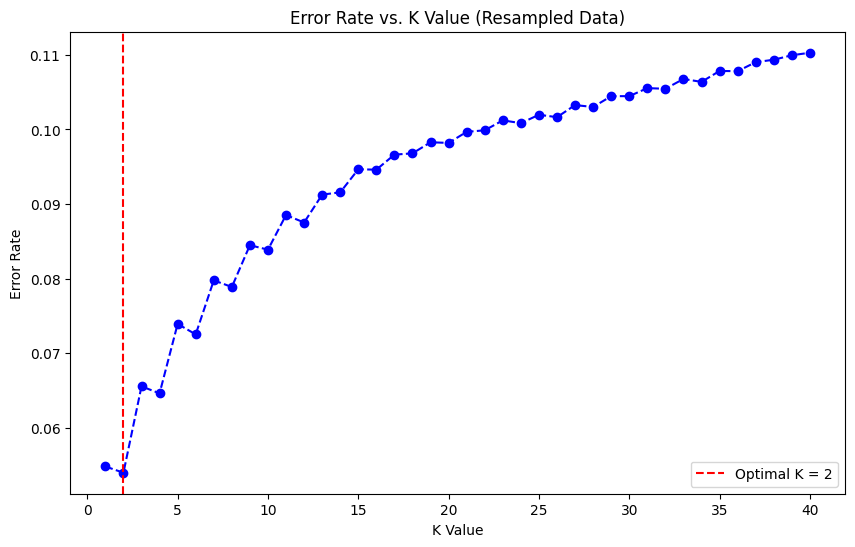

In [19]:
# define a range of k values to test on the resampled data
k_values_resampled = range(1, 41) # range to test for k
error_rates_resampled = []

# use 5-fold cross-validation on the resampled training data to compute error rates
for k in k_values_resampled:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    error_rate = 1 - scores.mean()
    error_rates_resampled.append(error_rate)
    print(f"k = {k}, Error Rate = {error_rate:.4f}")

# identify the optimal k value based on the resampled data
optimal_k_resampled = k_values_resampled[np.argmin(error_rates_resampled)]
print("\nOptimal K on resampled data:", optimal_k_resampled)

# visualize the error rates vs. k values for the resampled data
plt.figure(figsize=(10, 6))
plt.plot(k_values_resampled, error_rates_resampled, marker='o', linestyle='--', color='blue')
plt.title('Error Rate vs. K Value (Resampled Data)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.axvline(x=optimal_k_resampled, linestyle='--', color='red', label=f'Optimal K = {optimal_k_resampled}')
plt.legend()
plt.show()


Train the KNN model on Resampled Data

In [20]:
# train a new KNN model using the optimal_k determined previously, but with resampled data
knn_final_resampled = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final_resampled.fit(X_train_resampled, y_train_resampled)

# make predictions on the original test set
y_pred_resampled = knn_final_resampled.predict(X_test)

print(y_pred_resampled)

[1 0 1 ... 0 0 0]


Evaluate the new model.

Test Accuracy after resampling: 0.8387566779990286

Confusion Matrix:
[[6050 1215]
 [ 113  858]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7265
           1       0.41      0.88      0.56       971

    accuracy                           0.84      8236
   macro avg       0.70      0.86      0.73      8236
weighted avg       0.91      0.84      0.86      8236



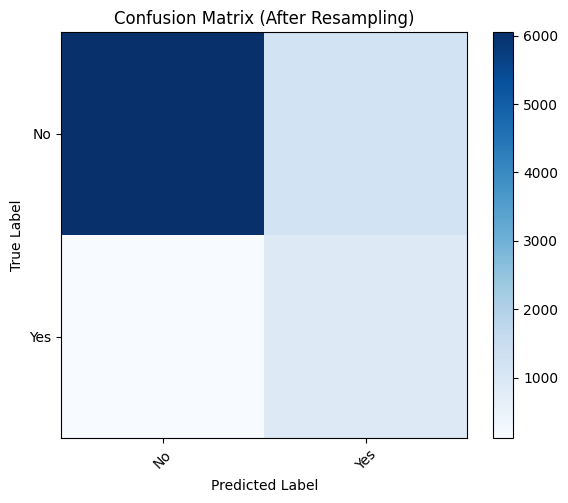

In [21]:
# evaluate the new model's performance
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print("Test Accuracy after resampling:", accuracy_resampled)

# show the confusion matrix and classification report
cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print("\nConfusion Matrix:")
print(cm_resampled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_resampled))

# visualize the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm_resampled, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (After Resampling)')
plt.colorbar()

classes = ['No', 'Yes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


#### Interpretation:

The total recall for class 1 (potential term deposit subscribers) increased dramatically to 88%. This translates to an 88% prediction rate of actual positives.
The resampled data enhances the model's robustness when dealing with the minority class.

The model's accuracy dropped to 84% which can happen when addressing class imbalances because the model now focuses more on detecting positives, even if that means sacrificing some accuracy on the majority class.

The reducred precision for Class 1 (41%) means that while the model is catching more positive cases, more of them are false positives. This is acceptable for the business use case because the false positives can be screened by a person and it leaves more confidence that the process is not missing opportunities. However, it is important to cost in mind for these screenings as it could potentially not be worth it if there are too many false positives.

Overall, these results suggest the model is now more effective at identifying the minority class.